In [25]:
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [3]:
dataset = "53_coffee.csv"
df=pd.read_csv(dataset)

In [5]:
df = pd.read_csv('53_coffee.csv')
print(df)

# initial data frame

    RID  Species                               Owner       Country.of.Origin  \
0     0  Arabica                           metad plc                Ethiopia   
1     1  Arabica                           metad plc                Ethiopia   
2     2  Arabica            grounds for health admin               Guatemala   
3     3  Arabica                 yidnekachew dabessa                Ethiopia   
4     4  Arabica                           metad plc                Ethiopia   
5     6  Arabica                       hugo valdivia                    Peru   
6     7  Arabica         ethiopia commodity exchange                Ethiopia   
7     8  Arabica         ethiopia commodity exchange                Ethiopia   
8     9  Arabica              diamond enterprise plc                Ethiopia   
9    10  Arabica                       mohammed lalo                Ethiopia   
10   11  Arabica  cqi q coffee sample representative           United States   
11   12  Arabica  cqi q coffee sample re

In [13]:
df[['Color','Species']].value_counts()

Color         Species
Green         Arabica    20
              Robusta    20
Bluish-Green  Arabica     4
Blue-Green    Robusta     3
Bluish-Green  Robusta     2
None          Arabica     1
dtype: int64

In [6]:
#select needed columns

df1 = pd.DataFrame(df, columns=["Species", "Country.of.Origin", "Aroma","Flavor","Aftertaste","Acidity","Mouthfeel","Color","altitude_mean_meters"])
print(df1)

    Species       Country.of.Origin  Aroma  Flavor  Aftertaste  Acidity  \
0   Arabica                Ethiopia   8.67    8.83        8.67     8.75   
1   Arabica                Ethiopia   8.75    8.67        8.50     8.58   
2   Arabica               Guatemala   8.42    8.50        8.42     8.42   
3   Arabica                Ethiopia   8.17    8.58        8.42     8.42   
4   Arabica                Ethiopia   8.25    8.50        8.25     8.50   
5   Arabica                    Peru   8.42    8.50        8.33     8.50   
6   Arabica                Ethiopia   8.25    8.33        8.50     8.42   
7   Arabica                Ethiopia   8.67    8.67        8.58     8.42   
8   Arabica                Ethiopia   8.08    8.58        8.50     8.50   
9   Arabica                Ethiopia   8.17    8.67        8.25     8.50   
10  Arabica           United States   8.25    8.42        8.17     8.33   
11  Arabica           United States   8.08    8.67        8.33     8.42   
12  Arabica  United State

In [18]:
#loop for each row, adding heroes to new columns

df2 = pd.DataFrame(df1)

for i in range(len(df2)):
    if (df2.loc[i,'Species'] == "Robusta"):
        df2.loc[i,'Species'] = 1
    elif (df2.loc[i,'Species'] == "Arabica"):
        df2.loc[i,'Species'] = 0

print(df2)

   Species       Country.of.Origin  Aroma  Flavor  Aftertaste  Acidity  \
0        0                Ethiopia   8.67    8.83        8.67     8.75   
1        0                Ethiopia   8.75    8.67        8.50     8.58   
2        0               Guatemala   8.42    8.50        8.42     8.42   
3        0                Ethiopia   8.17    8.58        8.42     8.42   
4        0                Ethiopia   8.25    8.50        8.25     8.50   
5        0                    Peru   8.42    8.50        8.33     8.50   
6        0                Ethiopia   8.25    8.33        8.50     8.42   
7        0                Ethiopia   8.67    8.67        8.58     8.42   
8        0                Ethiopia   8.08    8.58        8.50     8.50   
9        0                Ethiopia   8.17    8.67        8.25     8.50   
10       0           United States   8.25    8.42        8.17     8.33   
11       0           United States   8.08    8.67        8.33     8.42   
12       0  United States (Hawaii)   8

In [11]:
#make unique ID for each hero
df3 = pd.DataFrame(df2, columns=["Color"])

jeniswarna=[]
for i in range(len(df2)):
    jeniswarna.append(df3.loc[i,'Color'])
    
jeniswarna = list(dict.fromkeys(jeniswarna))
jeniswarna = sorted(jeniswarna)

In [15]:
df4 = pd.DataFrame(df2)

for i in range(len(df4)):
    x=(df4.loc[i,'Color'])
    xx=jeniswarna.index(x, 0, len(jeniswarna))
    df4.loc[i,'Color'] = xx

print(df4)

   Species       Country.of.Origin  Aroma  Flavor  Aftertaste  Acidity  \
0        0                Ethiopia   8.67    8.83        8.67     8.75   
1        0                Ethiopia   8.75    8.67        8.50     8.58   
2        0               Guatemala   8.42    8.50        8.42     8.42   
3        0                Ethiopia   8.17    8.58        8.42     8.42   
4        0                Ethiopia   8.25    8.50        8.25     8.50   
5        0                    Peru   8.42    8.50        8.33     8.50   
6        0                Ethiopia   8.25    8.33        8.50     8.42   
7        0                Ethiopia   8.67    8.67        8.58     8.42   
8        0                Ethiopia   8.08    8.58        8.50     8.50   
9        0                Ethiopia   8.17    8.67        8.25     8.50   
10       0           United States   8.25    8.42        8.17     8.33   
11       0           United States   8.08    8.67        8.33     8.42   
12       0  United States (Hawaii)   8

note color : 0 = Blue-Green
             1 = Bluish-Green
             2 = Green
             3 = None

In [19]:
df4.to_csv(r'./cleandata.csv', index=False)

In [20]:
data = pd.read_csv('./cleandata.csv')
data = data.drop(['Country.of.Origin','altitude_mean_meters'], axis=1)
data.head()

,Species,Aroma,Flavor,Aftertaste,Acidity,Mouthfeel,Color
0,0,8.67,8.83,8.67,8.75,8.50,2
1,0,8.75,8.67,8.50,8.58,8.42,2
2,0,8.42,8.50,8.42,8.42,8.33,2
3,0,8.17,8.58,8.42,8.42,8.50,2
4,0,8.25,8.50,8.25,8.50,8.42,2


In [22]:
X = data.drop('Species',axis=1)
y = data["Species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 0)

In [24]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_predict = nb.predict(X_test)

nb_acc_score = accuracy_score(y_test, nb_predict)
nb_acc_score

1.0

In [26]:
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': range(1, 16)}
knn_grid = GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(X_train, y_train)
best_n_neighbors = knn_grid.best_params_['n_neighbors']

knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)

knn_acc_score = accuracy_score(y_test, knn_predict)
knn_acc_score

1.0

In [38]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Regresi

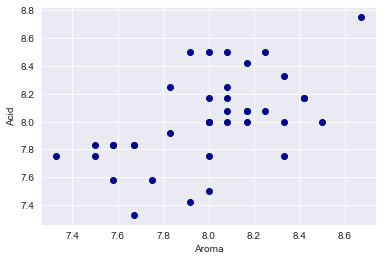

In [39]:
plt.scatter(train.Aroma, train.Acid,  color='darkblue')
plt.xlabel("Aroma")
plt.ylabel("Acid")
plt.show()

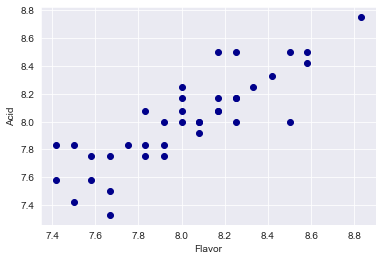

In [40]:
plt.scatter(train.Flavor, train.Acid,  color='darkblue')
plt.xlabel("Flavor")
plt.ylabel("Acid")
plt.show()

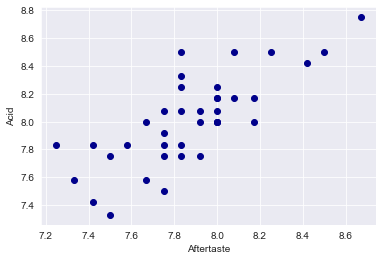

In [41]:
plt.scatter(train.Aftertaste, train.Acid,  color='darkblue')
plt.xlabel("Aftertaste")
plt.ylabel("Acid")
plt.show()

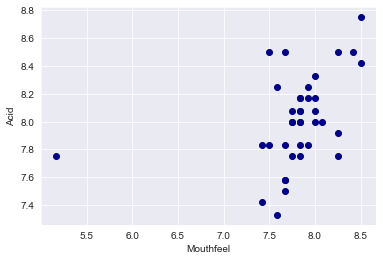

In [42]:
plt.scatter(train.Mouthfeel, train.Acid,  color='darkblue')
plt.xlabel("Mouthfeel")
plt.ylabel("Acid")
plt.show()

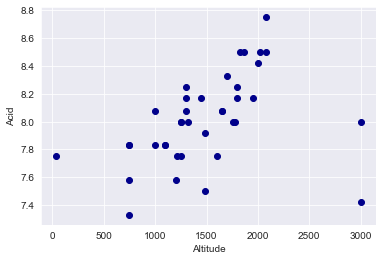

In [43]:
plt.scatter(train.altitude_mean_meters, train.Acid,  color='darkblue')
plt.xlabel("Altitude")
plt.ylabel("Acid")
plt.show()

## Rumus

### Aroma x Acid

In [44]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Aroma']])
train_y = np.asanyarray(train[['Acid']])
regr.fit (train_x, train_y)

LinearRegression()

In [45]:
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.58766254]]
Intercept:  [3.31272305]


Text(0, 0.5, 'Acid')

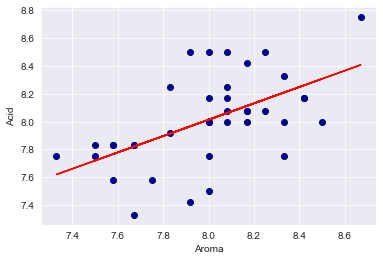

In [46]:
plt.scatter(train.Aroma, train.Acid,  color='darkblue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Aroma")
plt.ylabel("Acid")

In [56]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Aroma']])
test_y = np.asanyarray(test[['Acid']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.16
Residual sum of squares (MSE): 0.04
R2-score: 0.25


### Flavor x Acid

In [47]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Flavor']])
train_y = np.asanyarray(train[['Acid']])
regr.fit (train_x, train_y)

LinearRegression()

In [48]:
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.78502151]]
Intercept:  [1.71861833]


Text(0, 0.5, 'Acid')

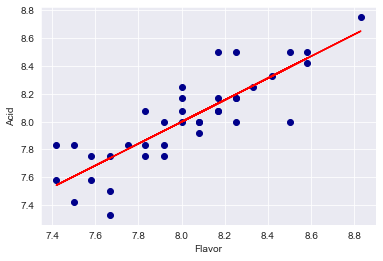

In [49]:
plt.scatter(train.Flavor, train.Acid,  color='darkblue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Flavor")
plt.ylabel("Acid")

In [57]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Flavor']])
test_y = np.asanyarray(test[['Acid']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.13
Residual sum of squares (MSE): 0.03
R2-score: 0.36


### Aftertase x Acid

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Aftertaste']])
train_y = np.asanyarray(train[['Acid']])
regr.fit (train_x, train_y)

Coefficients:  [[0.78502151]]
Intercept:  [1.71861833]


Text(0, 0.5, 'Acid')

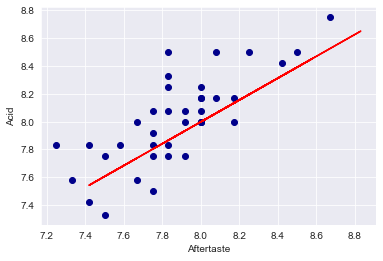

In [51]:
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
plt.scatter(train.Aftertaste, train.Acid,  color='darkblue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Aftertaste")
plt.ylabel("Acid")

In [58]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Aftertaste']])
test_y = np.asanyarray(test[['Acid']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.16
Residual sum of squares (MSE): 0.03
R2-score: 0.22


### Mouthfeel x Acid

In [52]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Flavor']])
train_y = np.asanyarray(train[['Acid']])
regr.fit (train_x, train_y)

LinearRegression()

Coefficients:  [[0.78502151]]
Intercept:  [1.71861833]


Text(0, 0.5, 'Acid')

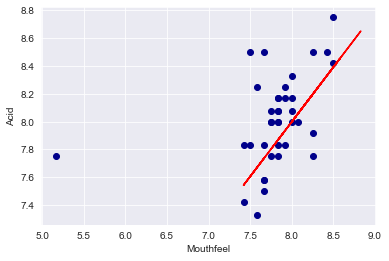

In [53]:
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
plt.scatter(train.Mouthfeel, train.Acid,  color='darkblue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Mouthfeel")
plt.ylabel("Acid")

In [59]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Mouthfeel']])
test_y = np.asanyarray(test[['Acid']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.15
Residual sum of squares (MSE): 0.03
R2-score: 0.06


### Altitude x Acid

In [54]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Flavor']])
train_y = np.asanyarray(train[['Acid']])
regr.fit (train_x, train_y)

LinearRegression()

Coefficients:  [[0.78502151]]
Intercept:  [1.71861833]


Text(0, 0.5, 'Acid')

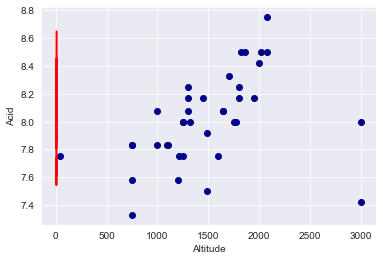

In [55]:
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
plt.scatter(train.altitude_mean_meters, train.Acid,  color='darkblue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Altitude")
plt.ylabel("Acid")

In [60]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['altitude_mean_meters']])
test_y = np.asanyarray(test[['Acid']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 1137.13
Residual sum of squares (MSE): 1528635.49
R2-score: -5.49
